# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muh. Afiq Ma'mun
- **Email:** muhafiq18@gmail.com
- **ID Dicoding:** muhafiq

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan cuaca mempengaruhi jumlah peminjaman sepeda?
- Bagaimana musim mempengaruhi orang untuk bersepeda?
- Bagaimana trend penyewaan sepeda per bulan pada tahun 2011 dan 2012?
- Jam berapakah jam paling sibuk dalam peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
days_df = pd.read_csv('/content/drive/MyDrive/datasets/Bike-sharing-dataset/day.csv')
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hours_df = pd.read_csv('/content/drive/MyDrive/datasets/Bike-sharing-dataset/hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Format data banyak yang menggunakan indikator tertentu, misalnya untuk kolom `yr` 0 = 2011 dan 1 = 2012
- Kolom `temp`, `atemp`, `hum`, dan `windspeed` menggunakan range data 0 hingga 1.

### Assessing Data

In [5]:
days_df.info()
days_df.isna().sum()
print("Jumlah duplikasi: ", days_df.duplicated().sum())
days_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hours_df.info()
hours_df.isna().sum()
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kedua dataframe mengandung tanggal yang bertipe data object, ini harus diubah kedalam format datetime
- Dataset tidak terdapat missing value, duplikasi data, dan kemungkinan kesalahan input
- Perlu mengubah format season (1:springer, 2:summer, 3:fall, 4:winter)
- Perlu mengubah format weather (1: Clear, 2: Mist/Cloudy, 3: Light Rain/Snow, 4: Heavy Rain/Snow)

### Cleaning Data

#### Mengubah tipe data datetime

In [7]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])

In [8]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

#### Mengubah format season

In [10]:
new_season_value = {
    1: 'springer',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

days_df['season'] = days_df['season'].map(new_season_value)
hours_df['season'] = hours_df['season'].map(new_season_value)

In [11]:
days_df['season'].value_counts()

,count
season,
fall,188
summer,184
springer,181
winter,178


In [12]:
hours_df['season'].value_counts()

,count
season,
fall,4496
summer,4409
springer,4242
winter,4232


#### Mengubah format weathersit

In [13]:
new_weather_value = {
    1: 'Clear',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

days_df['weathersit'] = days_df['weathersit'].map(new_weather_value)
hours_df['weathersit'] = hours_df['weathersit'].map(new_weather_value)

In [14]:
days_df['weathersit'].value_counts()

,count
weathersit,
Clear,463
Mist/Cloudy,247
Light Rain/Snow,21


In [15]:
hours_df['weathersit'].value_counts()

,count
weathersit,
Clear,11413
Mist/Cloudy,4544
Light Rain/Snow,1419
Heavy Rain/Snow,3


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

#### Bagaimana perubahan cuaca mempengaruhi jumlah peminjaman sepeda?

In [16]:
days_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

,cnt
weathersit,
Clear,2257952
Mist/Cloudy,996858
Light Rain/Snow,37869


Dapat dilihat bahwa cuaca sangat mempengaruhi orang untuk menggunakan sepeda, hal ini dibuktikan ketika cuaca cerah jumlah peminjam sepeda lebih banyak daripada saat mendung atau light rain. Jika ada data heavy rain, bisa dipastikan akan lebih sedikit orang meminjam sepeda jika dilihat dari pola diatas.

#### Bagaimana musim mempengaruhi orang untuk bersepeda?

In [17]:
days_df.groupby(by='season').agg({
    'cnt': 'sum',
}).sort_values(by='cnt', ascending=False)

,cnt
season,
fall,1061129
summer,918589
winter,841613
springer,471348


orang cenderung menggunakan sepeda saat musim gugur dan panas, faktor musim yang hangat ke panas membuat nyaman untuk berpergian dengan sepeda.

#### Bagaimana trend penyewaan sepeda per bulan pada tahun 2011 dan 2012?

In [18]:
days_df.groupby(by=['yr', 'mnth']).agg({
    'cnt': 'sum',
}).reset_index().assign(yr=lambda df: df['yr'] + 2011).sort_values(by=['yr', 'mnth'])

,yr,mnth,cnt
0,2011,1,38189
1,2011,2,48215
2,2011,3,64045
3,2011,4,94870
4,2011,5,135821
5,2011,6,143512
6,2011,7,141341
7,2011,8,136691
8,2011,9,127418
9,2011,10,123511


Trend penggunaan sepeda per bulan selama 2 tahun, yaitu tahun 2011 dan 2012

#### Jam berapakah jam paling sibuk dalam peminjaman sepeda?

In [19]:
hours_df.groupby(by='hr').agg({
    'cnt': 'sum',
}).sort_values(by='cnt', ascending=False)

,cnt
hr,
17,336860
18,309772
8,261001
16,227748
19,226789
13,184919
12,184414
15,183149
14,175652


Jika dilihat 4 teratas, ini adalah jam dimana orang berangkat dan pulang bekerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan cuaca mempengaruhi jumlah peminjaman sepeda?

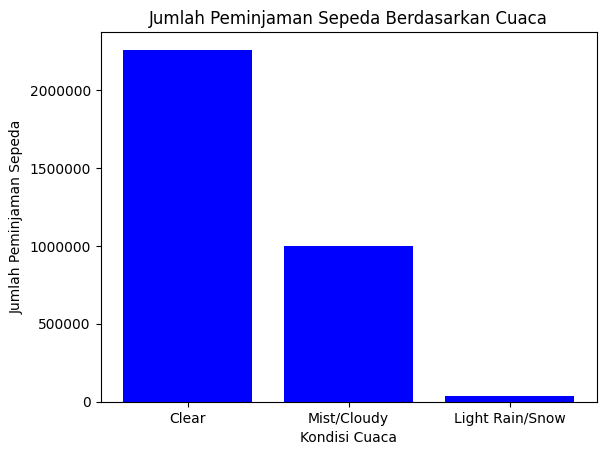

In [20]:
weather_cnt = days_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False)

plt.bar(weather_cnt.index, weather_cnt.values, color='blue')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Cuaca')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 2: Bagaimana musim mempengaruhi orang untuk bersepeda?

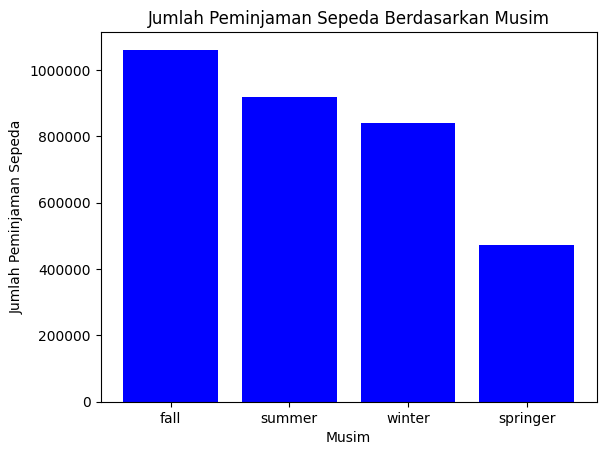

In [21]:
season = days_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

plt.bar(season.index, season.values, color='blue')
plt.xlabel('Musim')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Musim')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pertanyaan 3: Bagaimana trend penyewaan sepeda per bulan pada tahun 2011 dan 2012?

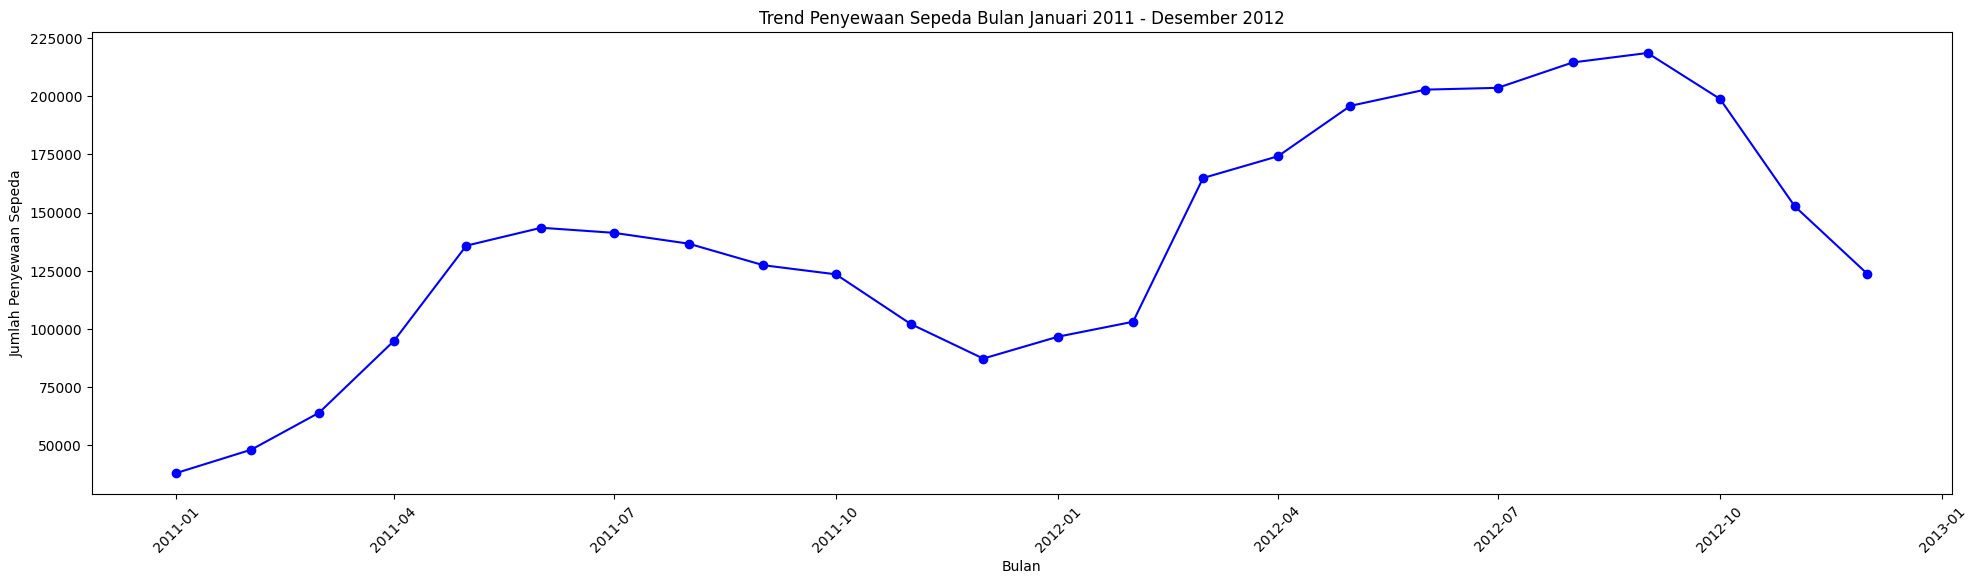

In [35]:
trend = days_df.groupby(by=['yr', 'mnth']).agg({
    'cnt': 'sum',
}).reset_index()

trend['yr'] = trend['yr'] + 2011

trend['date'] = pd.to_datetime(trend['yr'].astype(str) + '-' + trend['mnth'].astype(str))

plt.figure(figsize=(24, 6))
plt.plot(trend['date'], trend['cnt'], marker='o', linestyle='-', color='b')
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Trend Penyewaan Sepeda Bulan Januari 2011 - Desember 2012")
plt.show()


### Pertanyaan 4: Jam berapakah jam paling sibuk dalam peminjaman sepeda?

Text(0.5, 1.0, 'Jumlah Peminjaman Sepeda Berdasarkan Jam')

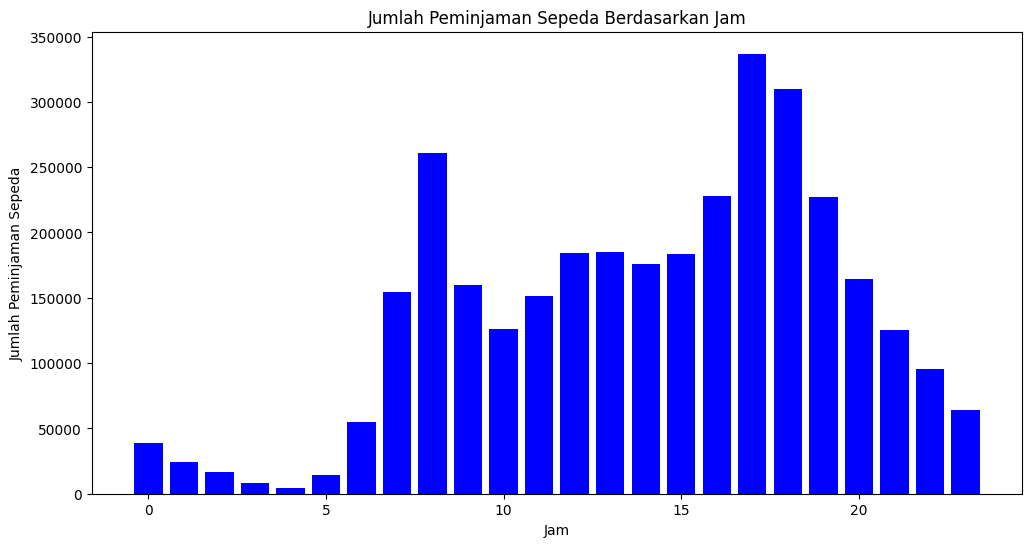

In [45]:
hours = hours_df.groupby(by='hr').agg({
    'cnt': 'sum',
}).reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hours['hr'], hours['cnt'], color='blue')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.title('Jumlah Peminjaman Sepeda Berdasarkan Jam')

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Bagaimana perubahan cuaca mempengaruhi jumlah peminjaman sepeda? orang cenderung menggunakan sepeda ketika cuaca cerah dan tidak hujan, ini dapat dilihat dari persebaran data yang menampilkan data saat "clear" lebih banyak orang menggunakan sepeda daripada cuaca lain.

- Conclution pertanyaan 2 : Bagaimana musim mempengaruhi orang untuk bersepeda? orang cenderung bersepeda pada musim yang hangat seperti musim gugur dan musim panas.

- Conclution pertanyaan 3 : Bagaimana trend penyewaan sepeda per bulan pada tahun 2011 dan 2012? Jika dilihat pada line chart, dapat disimpulkan bahwa penyewaan sepeda cenderung meningkat pada pertengahan tahun, sementara penurunan terjadi pada bulan desember hingga awal tahun. Ini menunjukan bahwa antara bulan-bulan ini berbanding lurus dengan bagaimana musim mempengaruhi orang untuk bersepeda.

- Conclution pertanyaan 4 : Jam berapakah jam paling sibuk dalam peminjaman sepeda? Berdasarkan gambaran pada bar chart, orang cenderung meminjam sepeda pada jam jam dimana mereka berangkat, dan pulang bekerja.

In [46]:
days_df.to_csv("days_data.csv", index=False)
hours_df.to_csv("hours_data.csv", index=False)